In [145]:
from typing import Dict, List, Tuple

import tqdm

import numpy as np
import pandas as pd

import scipy
import scipy.stats

import seaborn as sns
import matplotlib.pyplot as plt

import pathlib
import tttrlib

import os

from feda_tools import twodim_hist as tdh
from feda_tools import utilities as utils
from feda_tools import analysis as an

from decimal import Decimal, getcontext

In [146]:
# Load PTU Files
# file_path = pathlib.Path('//130.127.188.19/projects/FoxP_FKH-DNA/20220314_FoxP1_data_all_NK/20220310_V78C_monomer_NK/V78C_monomer_FoxP1_1hr/burstwise_All 0.2027#30')
# bid_path = pathlib.Path('//130.127.188.19/projects/FoxP_FKH-DNA/20220314_FoxP1_data_all_NK/20220310_V78C_monomer_NK/V78C_monomer_FoxP1_1hr/burstwise_All 0.2027#30/BIDs_30ph')

### for testing purposes ###
file_path = pathlib.Path('C:/Users/2administrator/Documents/source/repos/feda_tools/test data/2022/03_02_22_Troubleshooting_detection_efficiencies/Combined_old_thresholds/Split_After_Adjust_HF_54000s_pinhole6-000000.ptu')

#total time 816.9 seconds for this file
file_p ='C:/Users/2administrator/Documents/source/repos/feda_tools/test data/2022/03_02_22_Troubleshooting_detection_efficiencies/Combined_old_thresholds/Split_After_Adjust_HF_54000s_pinhole6-000000.ptu'

In [147]:
data = tttrlib.TTTR(file_p, 'PTU')

In [148]:
all_macro_times = data.macro_times
all_micro_times = data.micro_times
routing_channels = data.routing_channels

In [149]:
#in seconds. usually the first plots are in ms to see the bursts.
macro_res =data.get_header().macro_time_resolution

In [150]:
micro_res = data.get_header().micro_time_resolution

In [166]:
#iterate through macro and micro times to calculate delta time between photon events
arr_size = len(all_macro_times) - 1
photon_time_intervals = np.zeros(arr_size, dtype = np.float64)
lw = 0.25
for i in range(0, len(photon_time_intervals)):
    photon_1 = (all_macro_times[i]*macro_res) + (all_micro_times[i]*micro_res)
    photon_2 = (all_macro_times[i+1]*macro_res) + (all_micro_times[i+1]*micro_res)
    photon_time_intervals[i] = (photon_2 - photon_1)*1000

# create photon ID array
photon_ids = np.arange(1, arr_size + 1)


In [167]:
print(photon_time_intervals[-1])

2.3073616332567326


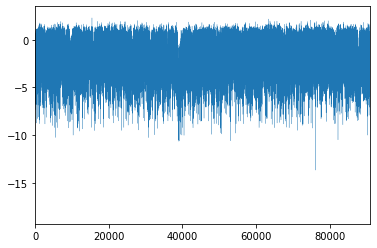

In [173]:
plt.plot(photon_ids, np.log(photon_time_intervals), linewidth = 0.25)
plt.xlim(0, 91000)
plt.show()

In [169]:
# Calculate the running average
cumulative_sum = np.cumsum(photon_time_intervals)
running_average = cumulative_sum / np.arange(1, len(photon_time_intervals) + 1)

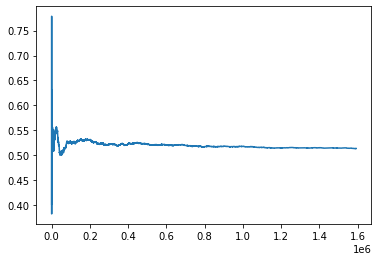

In [170]:
plt.plot(photon_ids, running_average)

In [174]:
def running_average(data, window_size):
    window = np.ones(window_size) / window_size
    return np.convolve(data, window, mode='valid')

# Create a NumPy array
data = photon_time_intervals

# Set the window size for the running average
window_size = 30

# Calculate the running average
running_avg = running_average(data, window_size)



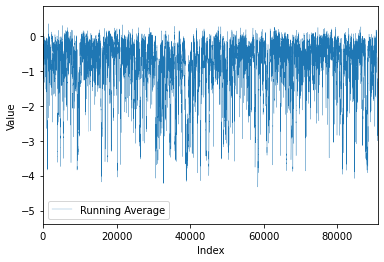

In [175]:
# Plot the original data and the running average
# plt.plot(data, label='Original Data')
plt.plot(np.arange(window_size - 1, len(data)), np.log(running_avg), label='Running Average', linewidth = lw)
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.xlim(0, 91000)
plt.show()